# Reproducing the article's figures

## Import the necessary libraries and set figure parameters


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from functools import reduce
import matplotlib
from matplotlib.patches import Patch
from matplotlib import gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.font_manager as font_manager
from matplotlib.patches import PathPatch
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
# matplotlib parameters to export figures to latex with the adequate font type
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# matplotlib parameters for figures layout
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.autolayout"] = True

## Figure 3: usability metrics

### Define the grid for the multi- panel figure

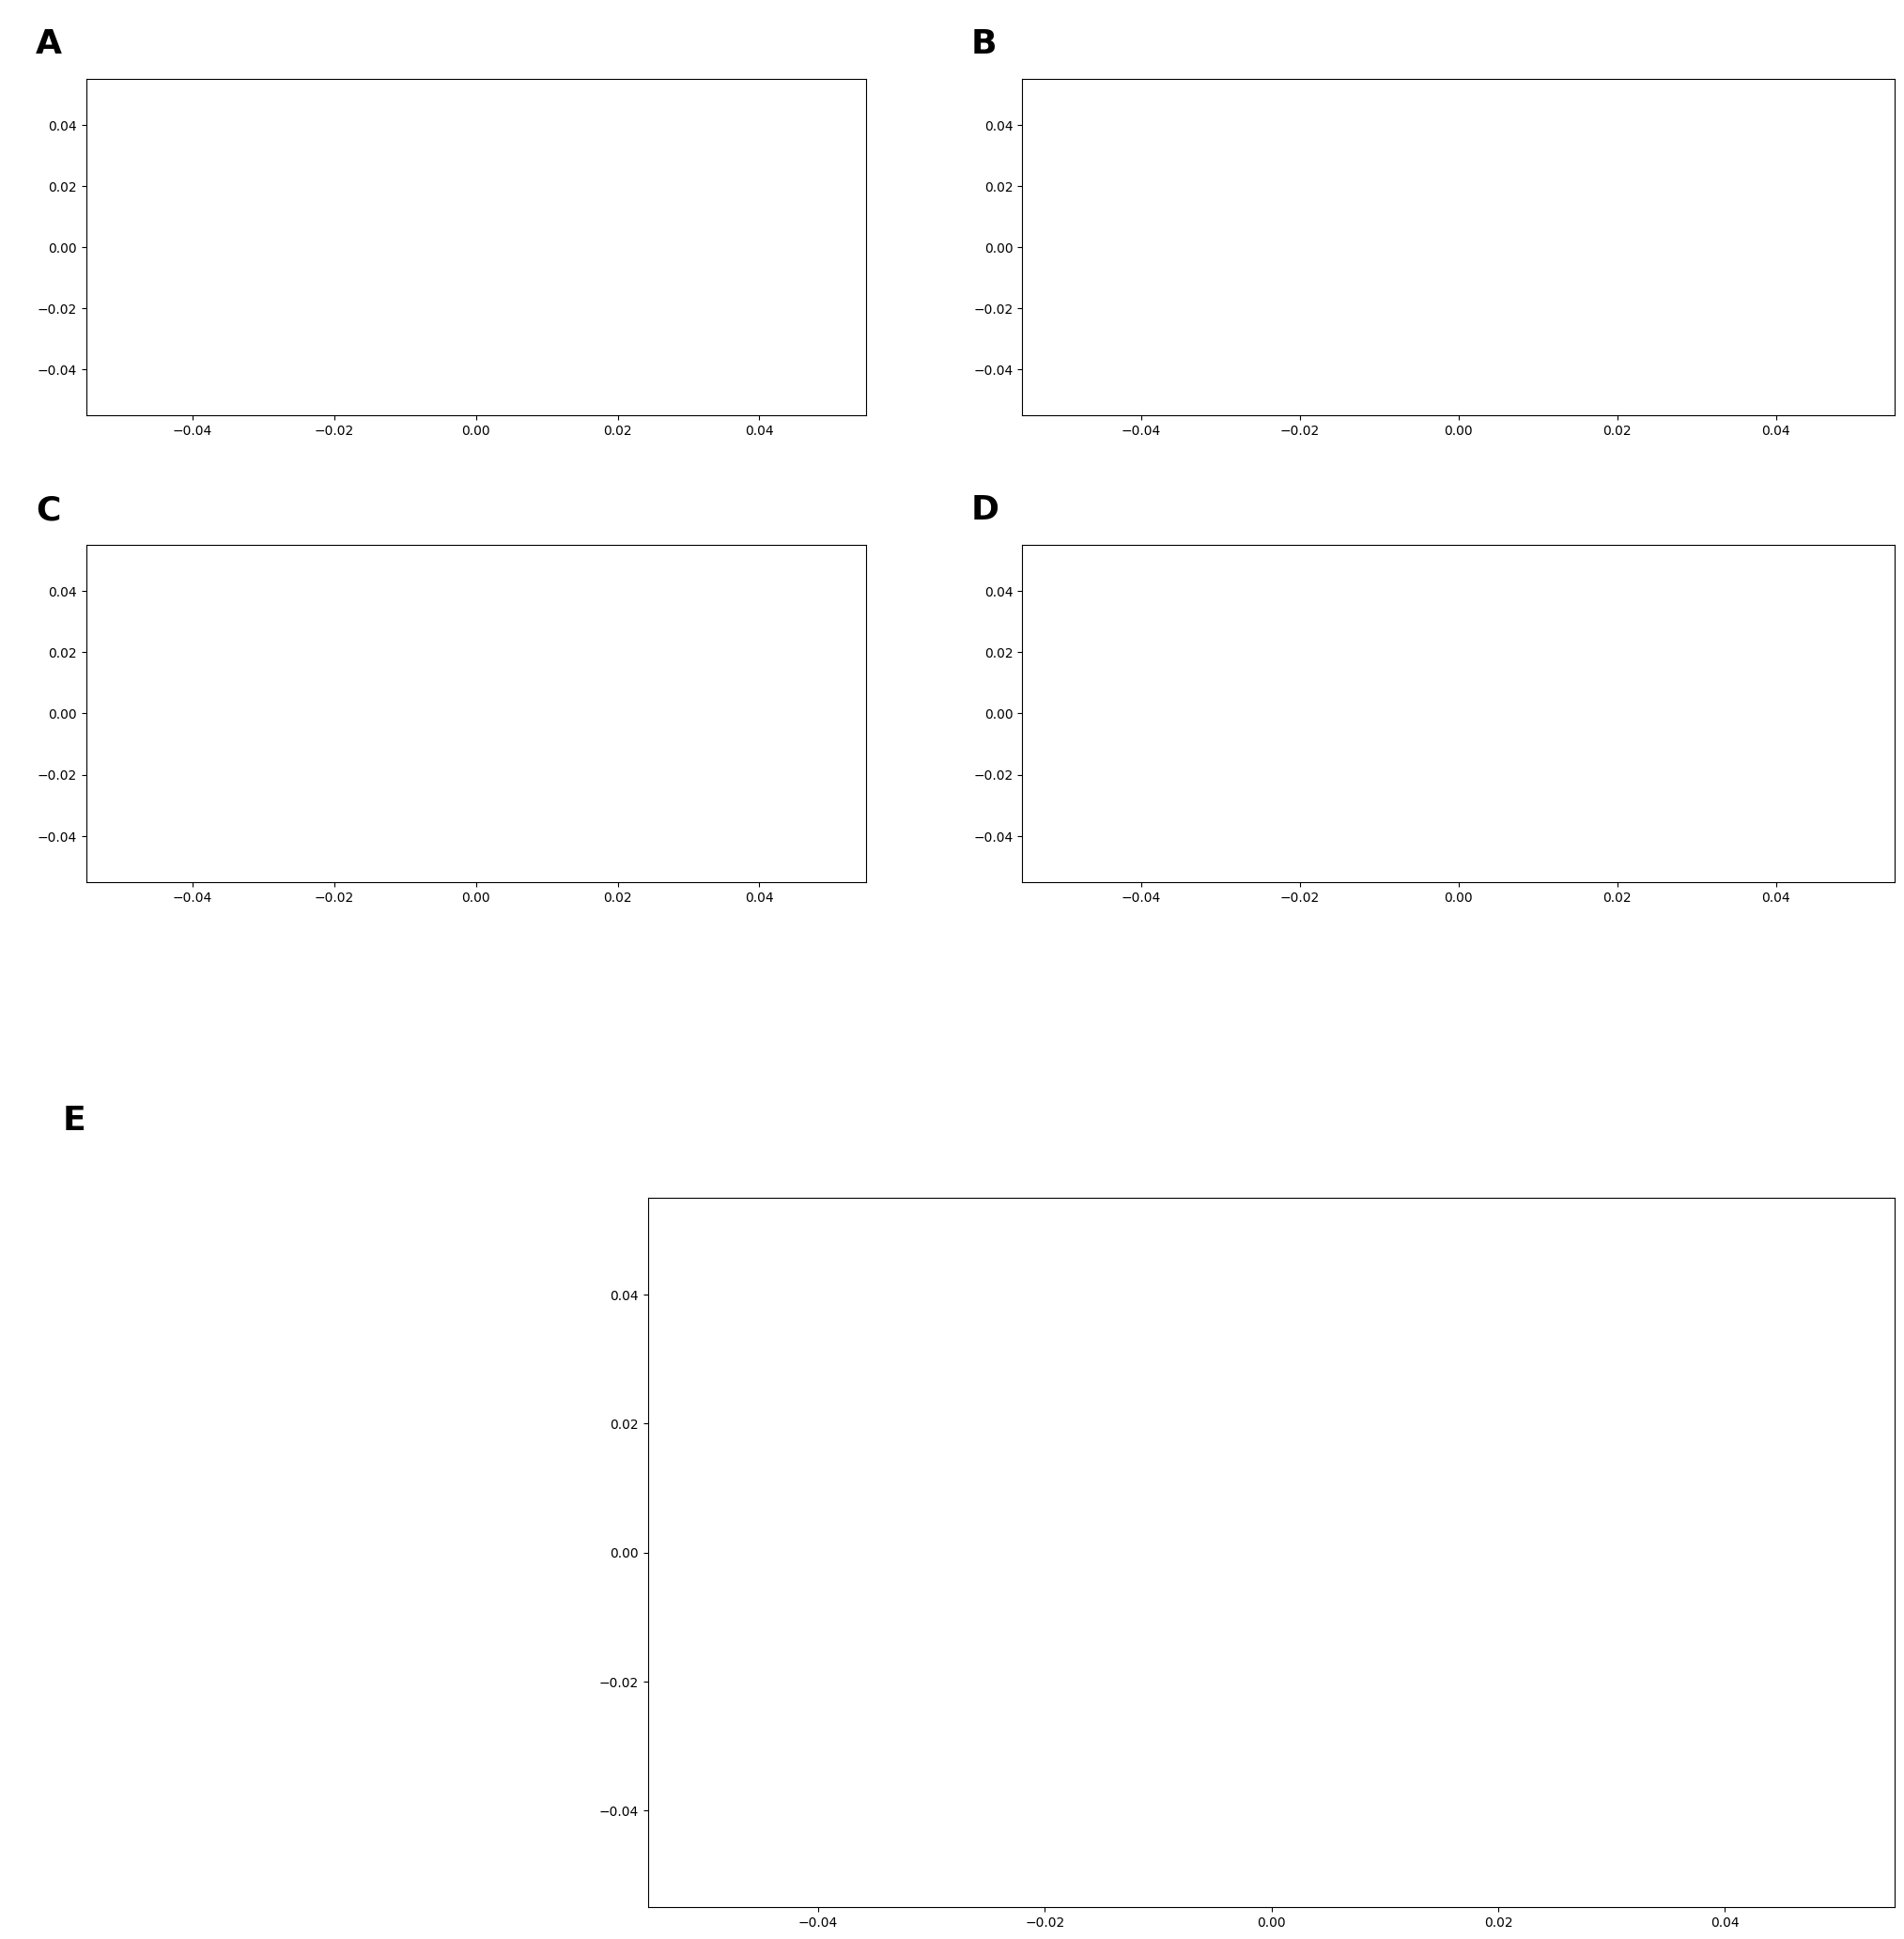

In [38]:
# define function to assign a label to each of the panels of the figure
def setlabel(ax, label, loc=2, borderpad=-1.5, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(np.NaN, np.NaN, color='none', label=label)
    font = font_manager.FontProperties(weight='bold', style='normal', size=26)
    label_legend = ax.legend(handles=[line], loc=loc, handlelength=0, handleheight=0,
                             handletextpad=0, prop=font,
                             borderaxespad=0, borderpad=borderpad, frameon=False, **kwargs)

    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()


# Define multipanel figure
fig = plt.figure()
gs = gridspec.GridSpec(20, 40)
# Divide the figure into a 3x2 grid, and give me the first section
# ax1 = fig.add_subplot(321)
ax1 = fig.add_subplot(gs[0:4, 0:9])
# Divide the figure into a 3x2 grid, and give me the second section
# ax2 = fig.add_subplot(322)
ax2 = fig.add_subplot(gs[0:4, 10:20])
# Divide the figure into a 3x2 grid, and give me the third section
# ax3 = fig.add_subplot(323)
ax3 = fig.add_subplot(gs[5:9, 0:9])
# Divide the figure into a 3x2 grid, and give me the forth section
# ax4 = fig.add_subplot(324)
ax4 = fig.add_subplot(gs[5:9, 10:20])
# Divide the figure into a 3x2 grid, and give me the fifth and sixth section
# ax5 = fig.add_subplot(313)
ax5 = fig.add_subplot(gs[12:40, 6:20])
# ax5.set_aspect('auto')

# Label figures
ax_list = [ax1, ax2, ax3, ax4]
ax_labels = ['A', 'B', 'C', 'D']

for a, b in zip(ax_list, ax_labels):
    setlabel(a, b)

# Special label for heat map
legend = ax5.get_legend()
if legend:
    ax5.add_artist(legend)
line, = ax5.plot(np.NaN, np.NaN, color='none', label='E')
font = font_manager.FontProperties(weight='bold', style='normal', size=26)
label_legend = ax5.legend(handles=[line], bbox_to_anchor=[-0.44, 1.15], handlelength=0, handleheight=0,
                          handletextpad=0, prop=font,
                          borderaxespad=0, frameon=False)

label_legend.remove()
ax5.add_artist(label_legend)
line.remove()

### Figure 3A: Task completion bar plot

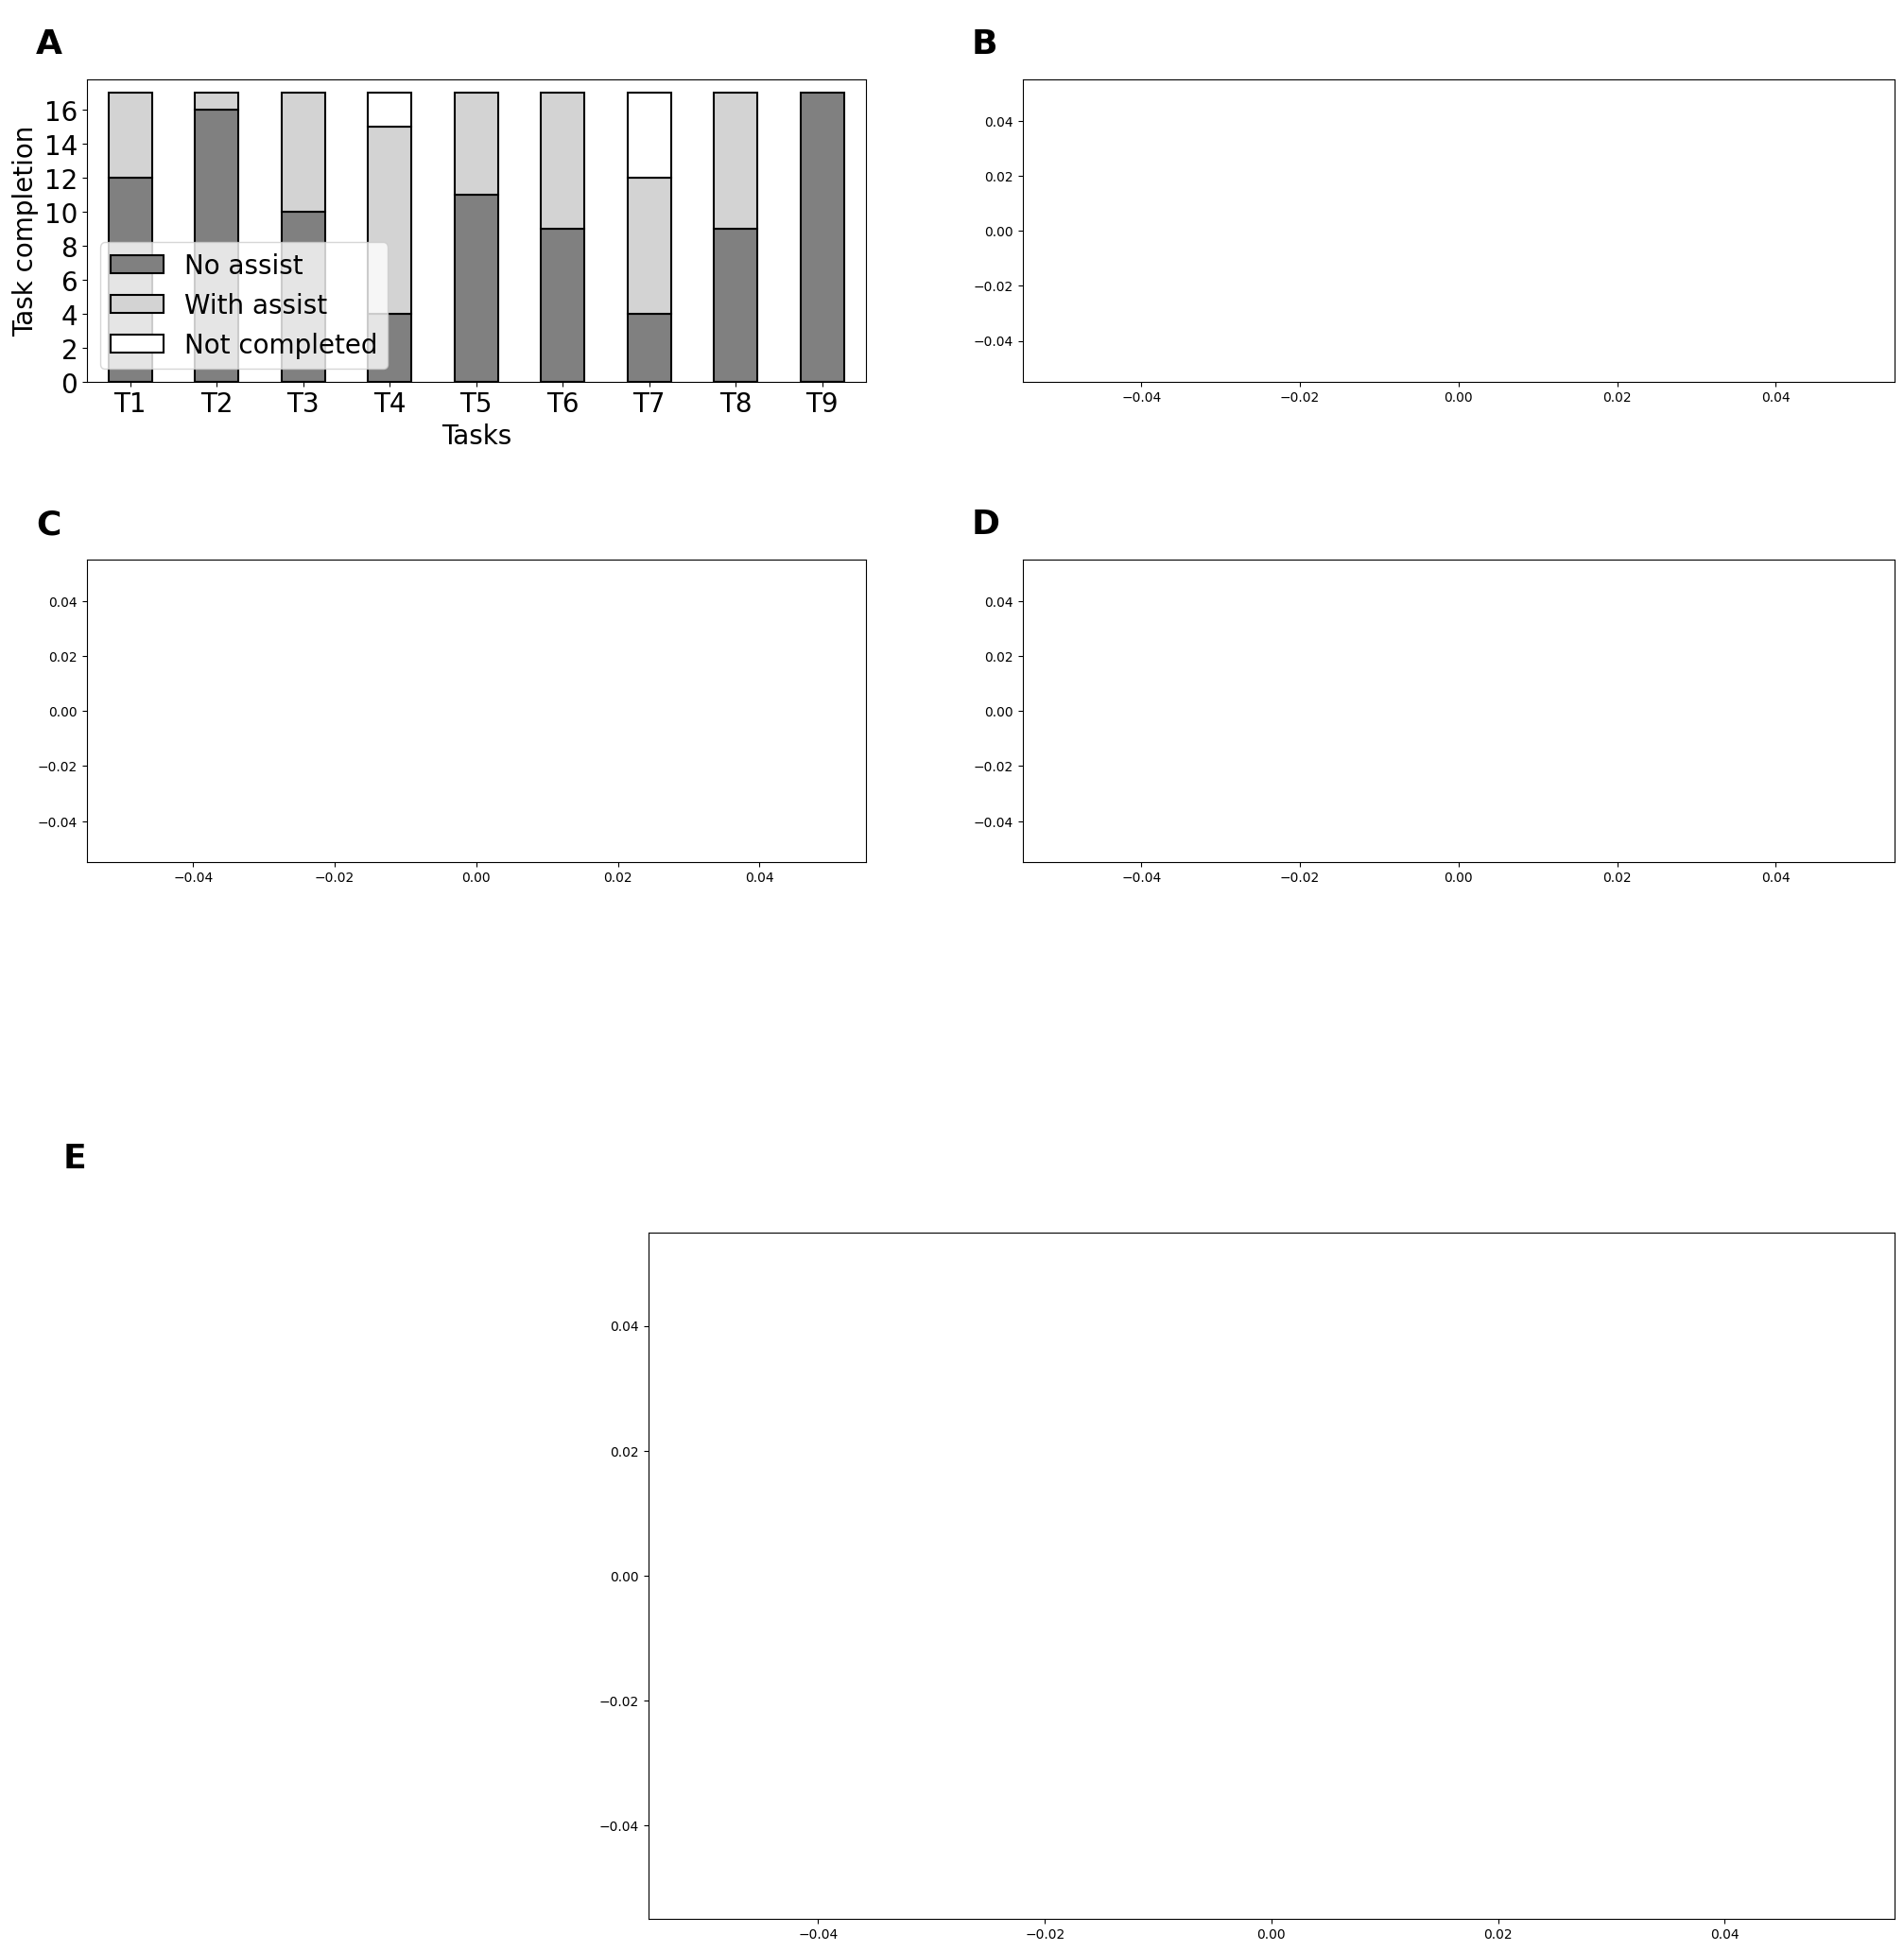

In [39]:
# Import assists and scores datasets from csv
df_success = pd.read_csv(
    'data/tasks/completion/taskSuccess.csv', encoding='utf16', index_col=0)
df_success_withAssist = pd.read_csv(
    'data/tasks/completion/taskSuccessAssistance.csv', encoding='utf16', index_col=0)

# Combine the total columns
df_list_F3A = [df_success[['Total']], df_success_withAssist[['Total']], ]
df_plot_F3A = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), df_list_F3A)

df_plot_F3A = df_plot_F3A.rename({'Total_x': 'No assist', 'Total_y': 'With assist'}, axis=1)
df_plot_F3A['Not completed'] = 17 - df_plot_F3A['No assist'] - df_plot_F3A['With assist']
# Plot the task success and
sp_F3A = df_plot_F3A.plot(
    kind='bar', stacked=True, rot=0, fontsize=20,
    color=['#808080', '#d3d3d3', 'white'],
    edgecolor='black', linewidth=1.5,
    ax=ax1,
)
sp_F3A.legend(fontsize=20, loc='lower left')  # loc=1, bbox_to_anchor=(0.9,1.0))
sp_F3A.set_ylabel('Task completion', fontsize=20)
sp_F3A.set_xlabel('Tasks', fontsize=20)
sp_F3A.set_ylim([0, 17.8])
display(fig)

### Figure 3B: Number of assists from the usability testing moderator to the participants

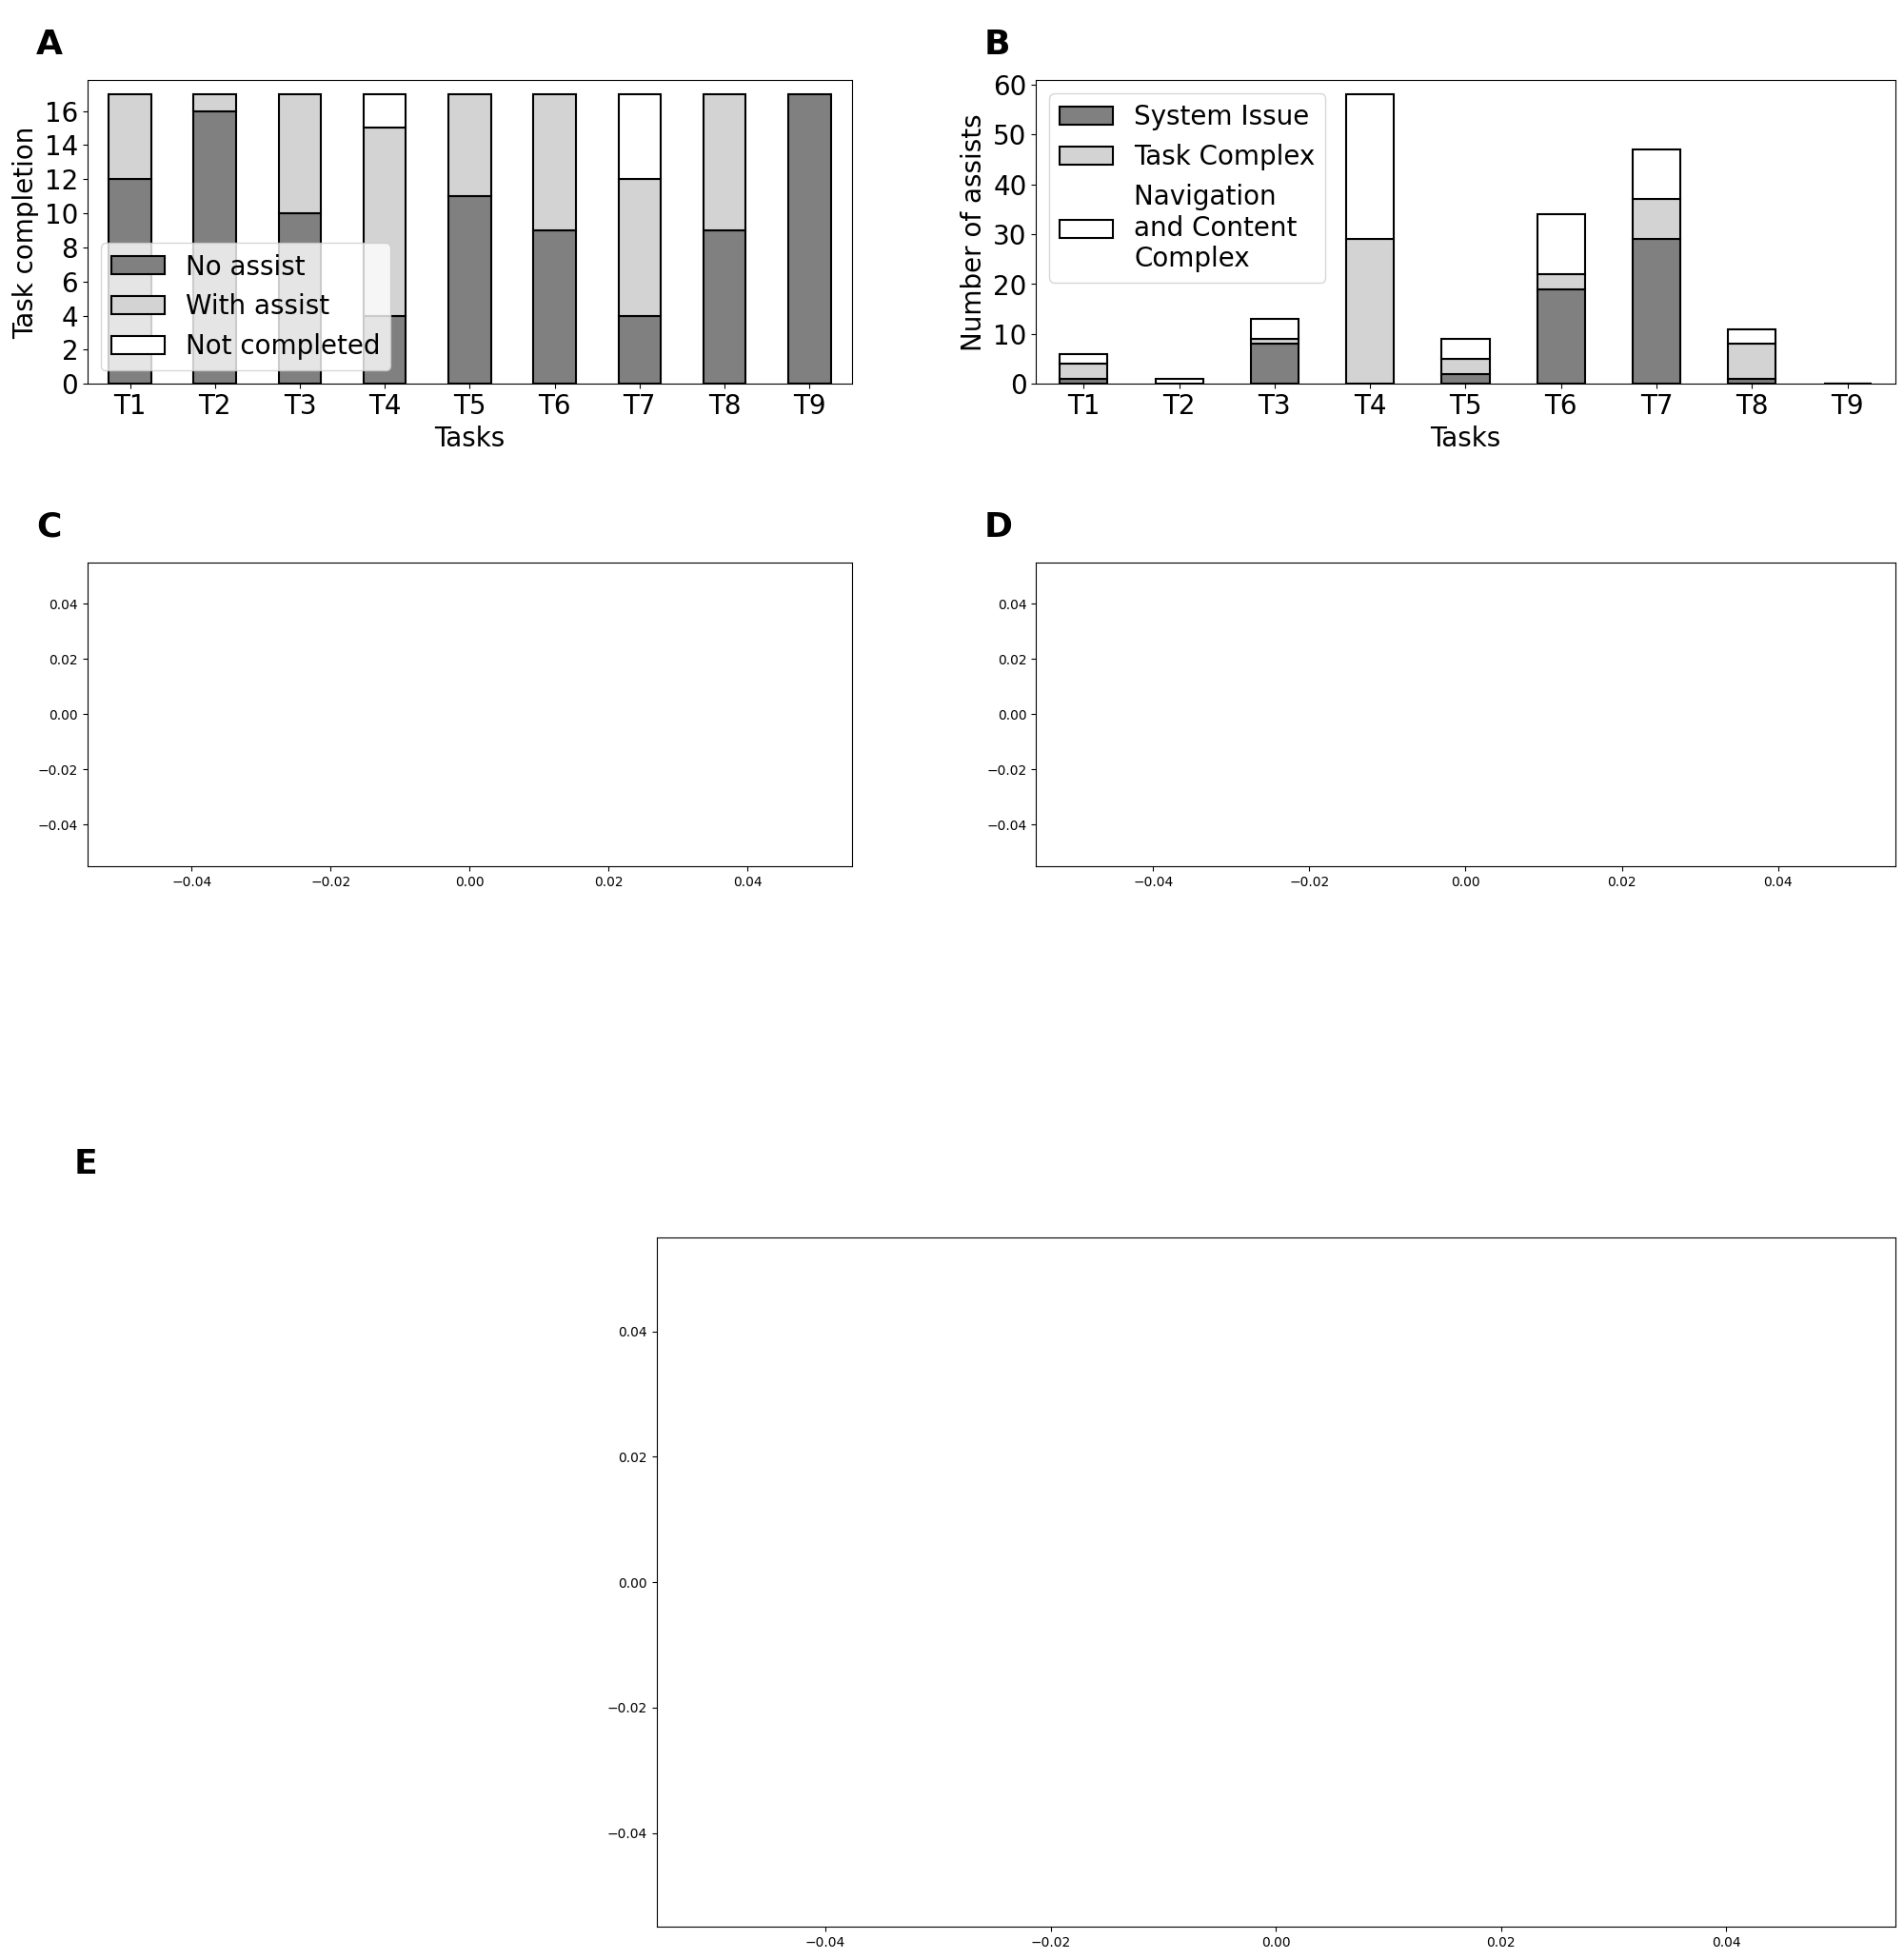

In [40]:
# Import assists and scores datasets from csv
df_assist = pd.read_csv(
    'data/tasks/completion/taskAssist.csv', encoding='utf16', index_col=0)
df_assist_systemIssue = pd.read_csv(
    'data/tasks/completion/taskAssistSystemIssue.csv', encoding='utf16', index_col=0)
df_assist_taskComplex = pd.read_csv(
    'data/tasks/completion/taskAssistTaskComplex.csv', encoding='utf16', index_col=0)
df_assist_navigationAndContentComplex = pd.read_csv(
    'data/tasks/completion/taskAssistNavigationComplex.csv', encoding='utf16', index_col=0)

# Combine the total columns
df_list_F3B = [
    df_assist_systemIssue[['Total']], df_assist_taskComplex[['Total']], df_assist_navigationAndContentComplex[['Total']]
]
df_plot_F3B = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), df_list_F3B)
df_plot_F3B = df_plot_F3B.rename(
    {'Total_x': 'System Issue', 'Total_y': 'Task Complex', 'Total': 'Navigation \nand Content \nComplex'}, axis=1)
# Plot the task success and
sp_F3B = df_plot_F3B.plot(
    kind='bar', stacked=True, rot=0, fontsize=20,
    color=['#808080', '#d3d3d3', 'white'],
    edgecolor='black', linewidth=1.5,
    ax=ax2,
)
sp_F3B.legend(fontsize=20, loc='upper left')
sp_F3B.set_ylabel('Number of assists', fontsize=20)
sp_F3B.set_xlabel('Tasks', fontsize=20)
display(fig)

### Figure 3C: Time per task box plot

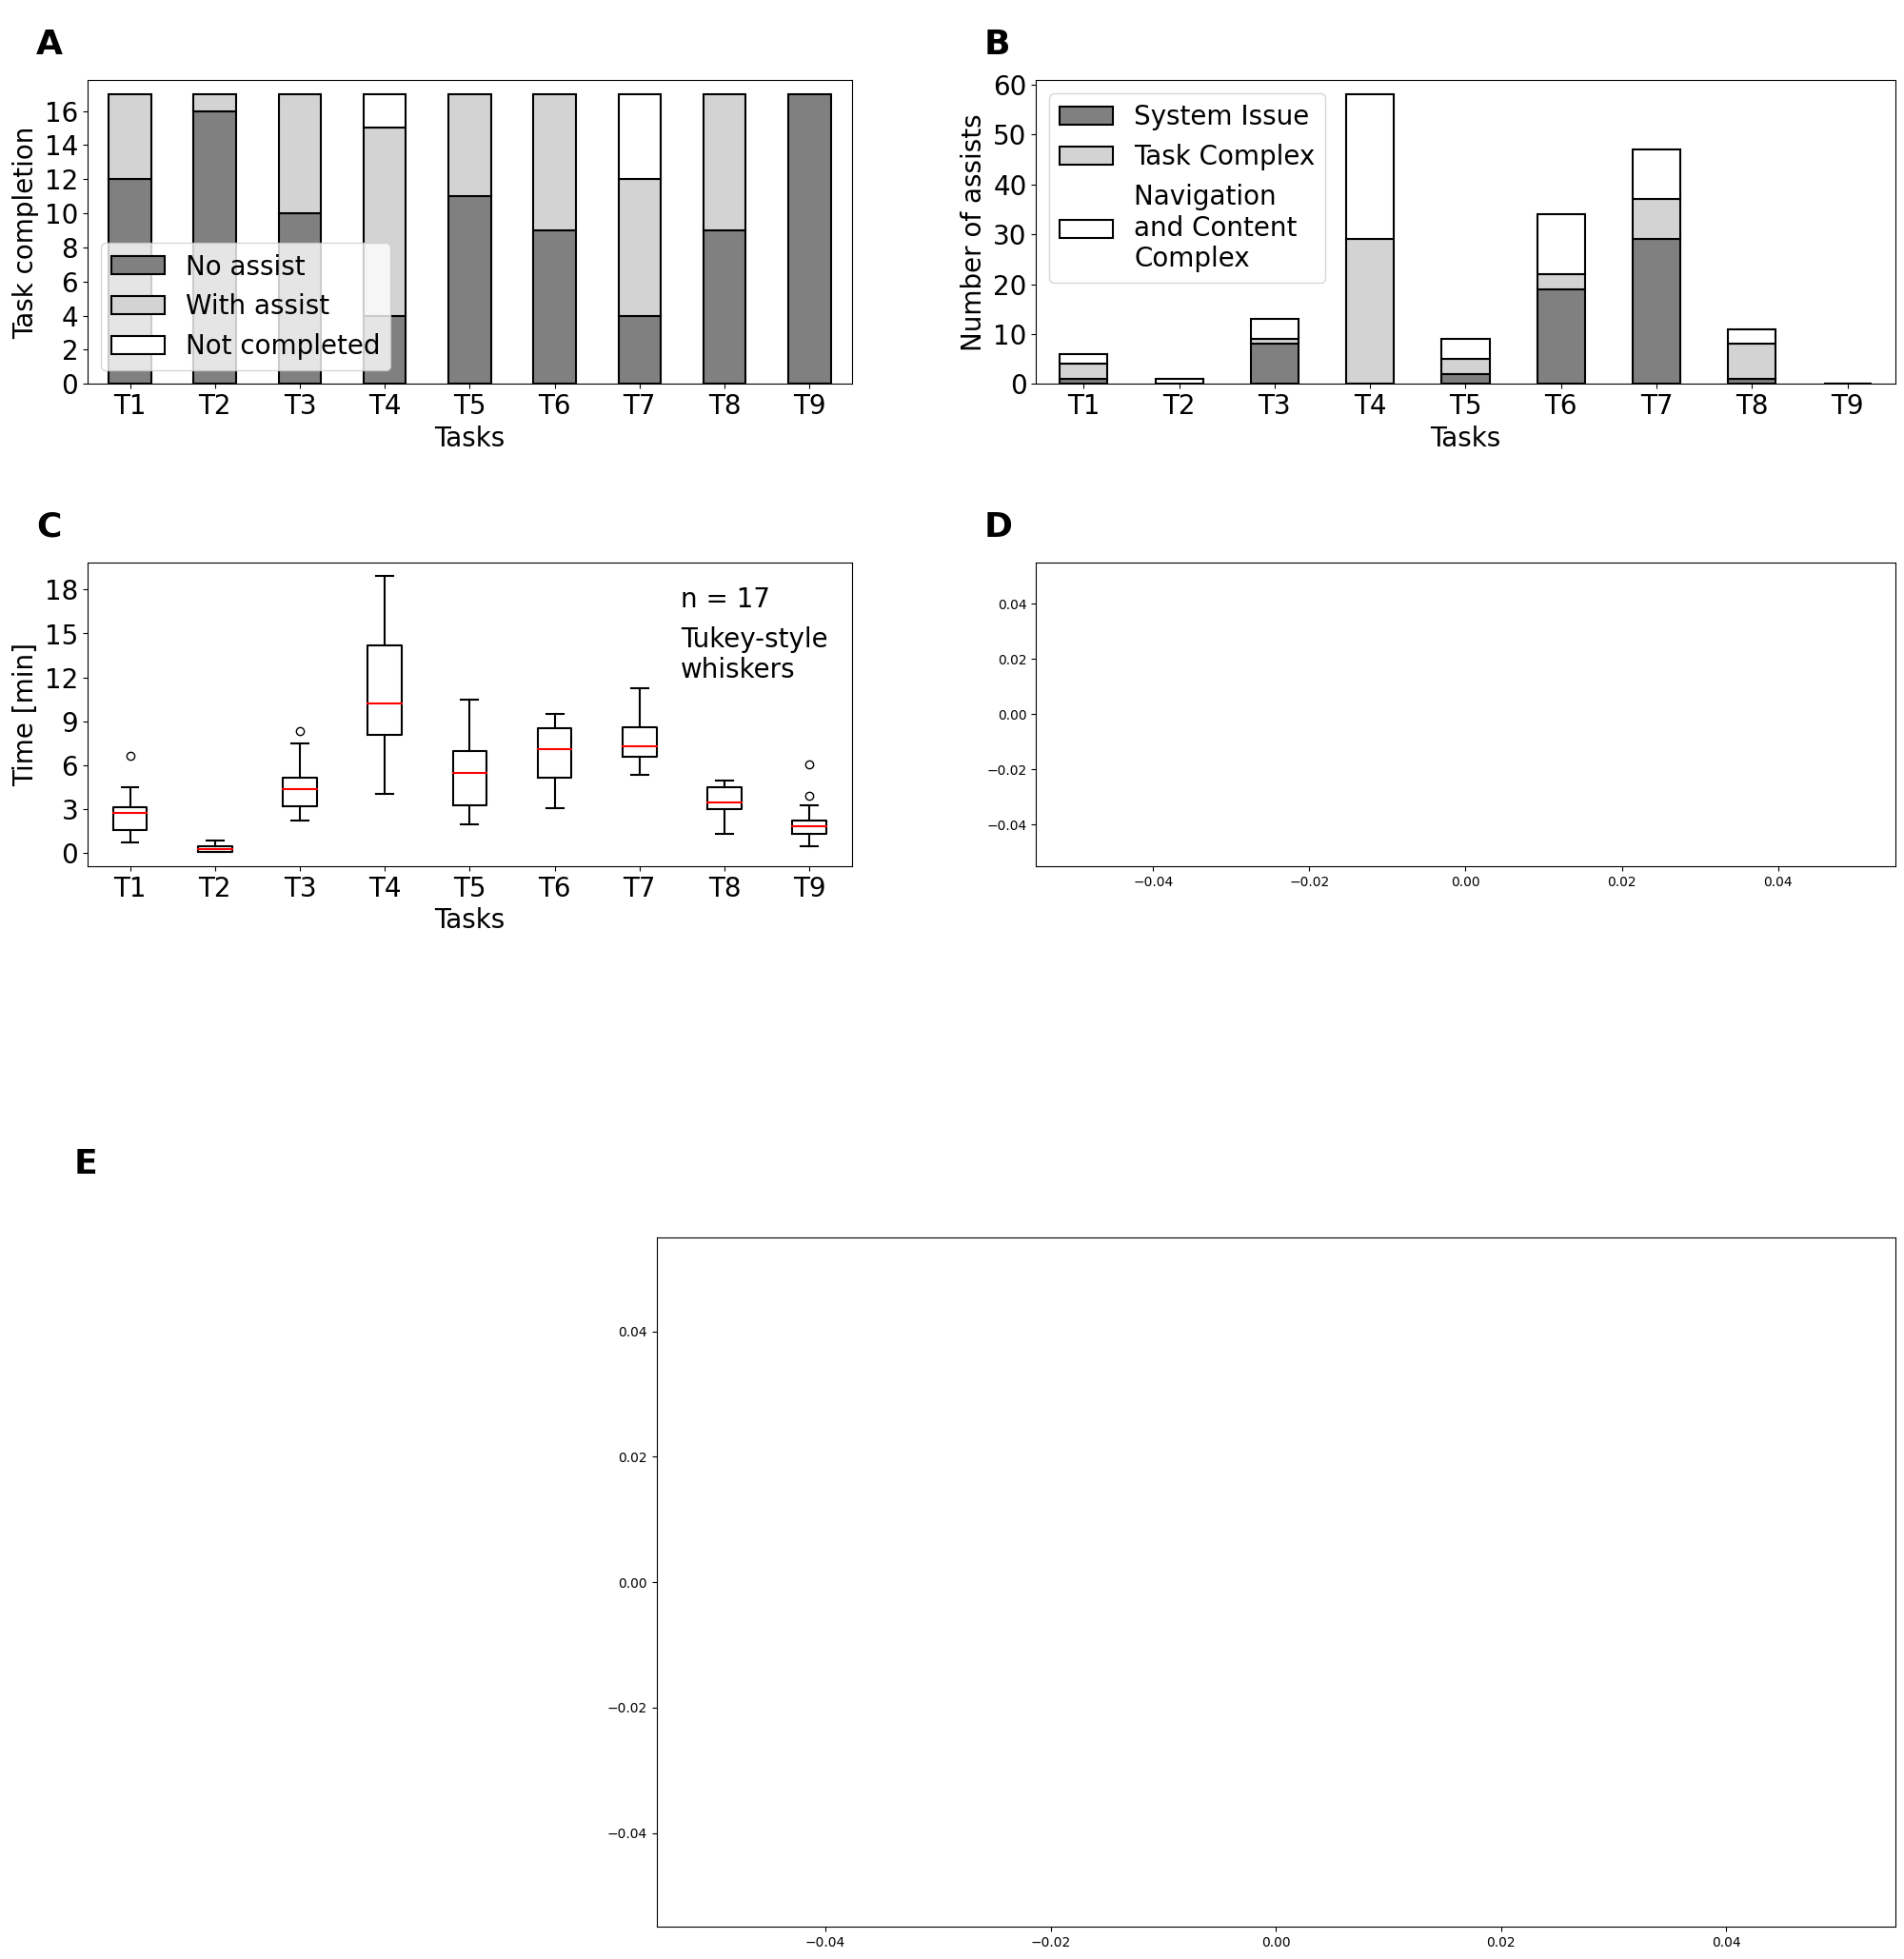

In [41]:
# Import time per task datasets from csv
# List of all the files available
csvFilesAvail = glob.glob('data/tasks/time' + '/*.{}'.format('csv'))


# Function to proces the time per task files
def taskTimeFormat(csvFilePath):
    TT_df = pd.read_csv(csvFilePath)
    # Convert to datetime format and extract minutes
    TT_df['SingleTime'] = TT_df.SingleTime.apply(
        lambda x: datetime.strptime('00:' + x, '%H:%M:%S.%f')) - datetime.strptime(
        '00:00:00.0', '%H:%M:%S.%f')
    TT_df['SingleTime'] = TT_df['SingleTime'].apply(lambda x: x / np.timedelta64(1, 'm'))
    TT_df['SumTime'] = TT_df.SumTime.apply(lambda x: datetime.strptime('00:' + x, '%H:%M:%S.%f')) - datetime.strptime(
        '00:00:00.0', '%H:%M:%S.%f')
    TT_df['SumTime'] = TT_df['SumTime'].apply(lambda x: x / np.timedelta64(1, 'm'))
    # Set index for the different task for a future merge
    TT_df = TT_df.set_index('Task')
    # Rename columns to add participants number
    TT_df.rename(
        columns={'SumTime': 'SumTime' + csvFilePath.partition('''TaskTime/TimeTask''')[2].partition('.csv')[0],
                 'SingleTime': 'SingleTime' +
                               csvFilePath.partition('''TaskTime/TimeTask''')[2].partition('.csv')[0]},
        inplace=True)
    return TT_df


# Apply function to all the data set
TT_df_list = [taskTimeFormat(item) for item in csvFilesAvail]
TT_Summary = reduce(lambda left, right: pd.merge(left, right, on='Task'), TT_df_list)
# onlySingleT = [c for c in TT_Summary.columns if c.lower()[:4] != 'SumTime']
TT_singleT = TT_Summary.loc[:, ~TT_Summary.columns.str.startswith('SumTime')]

# Rename column to select only P1, P2 ...
TT_singleT.columns = [pp.split('Time', 1)[1] for pp in TT_singleT.columns]

# Plot time on task
labelsT = ['T' + str(i + 1) for i in range(9)]
sp_F3C = TT_singleT.T.plot(kind='box', fontsize=20, widths=0.4, labels=TT_singleT.T.columns,
                           # patch_artist=True, notch=True, bootstrap=10000,
                           # color=dict(boxes='black', whiskers='black', medians='red', caps='black'),
                           boxprops=dict(linestyle='-', linewidth=1.5),
                           medianprops=dict(linestyle='-', linewidth=1.5, color='red'),
                           whiskerprops=dict(linestyle='-', linewidth=1.5),
                           capprops=dict(linestyle='-', linewidth=1.5),
                           ax=ax3,
                           )
sp_F3C.set_ylabel('Time [min]', fontsize=20)
sp_F3C.set_xlabel('Tasks', fontsize=20)
sp_F3C.legend(['n = 17', 'Tukey-style\nwhiskers'],
              loc='upper right', ncol=1,
              bbox_to_anchor=(1, 1),
              frameon=False, handlelength=0,
              fontsize=20)
sp_F3C.yaxis.set_major_locator(MaxNLocator(integer=True))
display(fig)

### Figure 3D: PSSUQ scores and scales boxplots

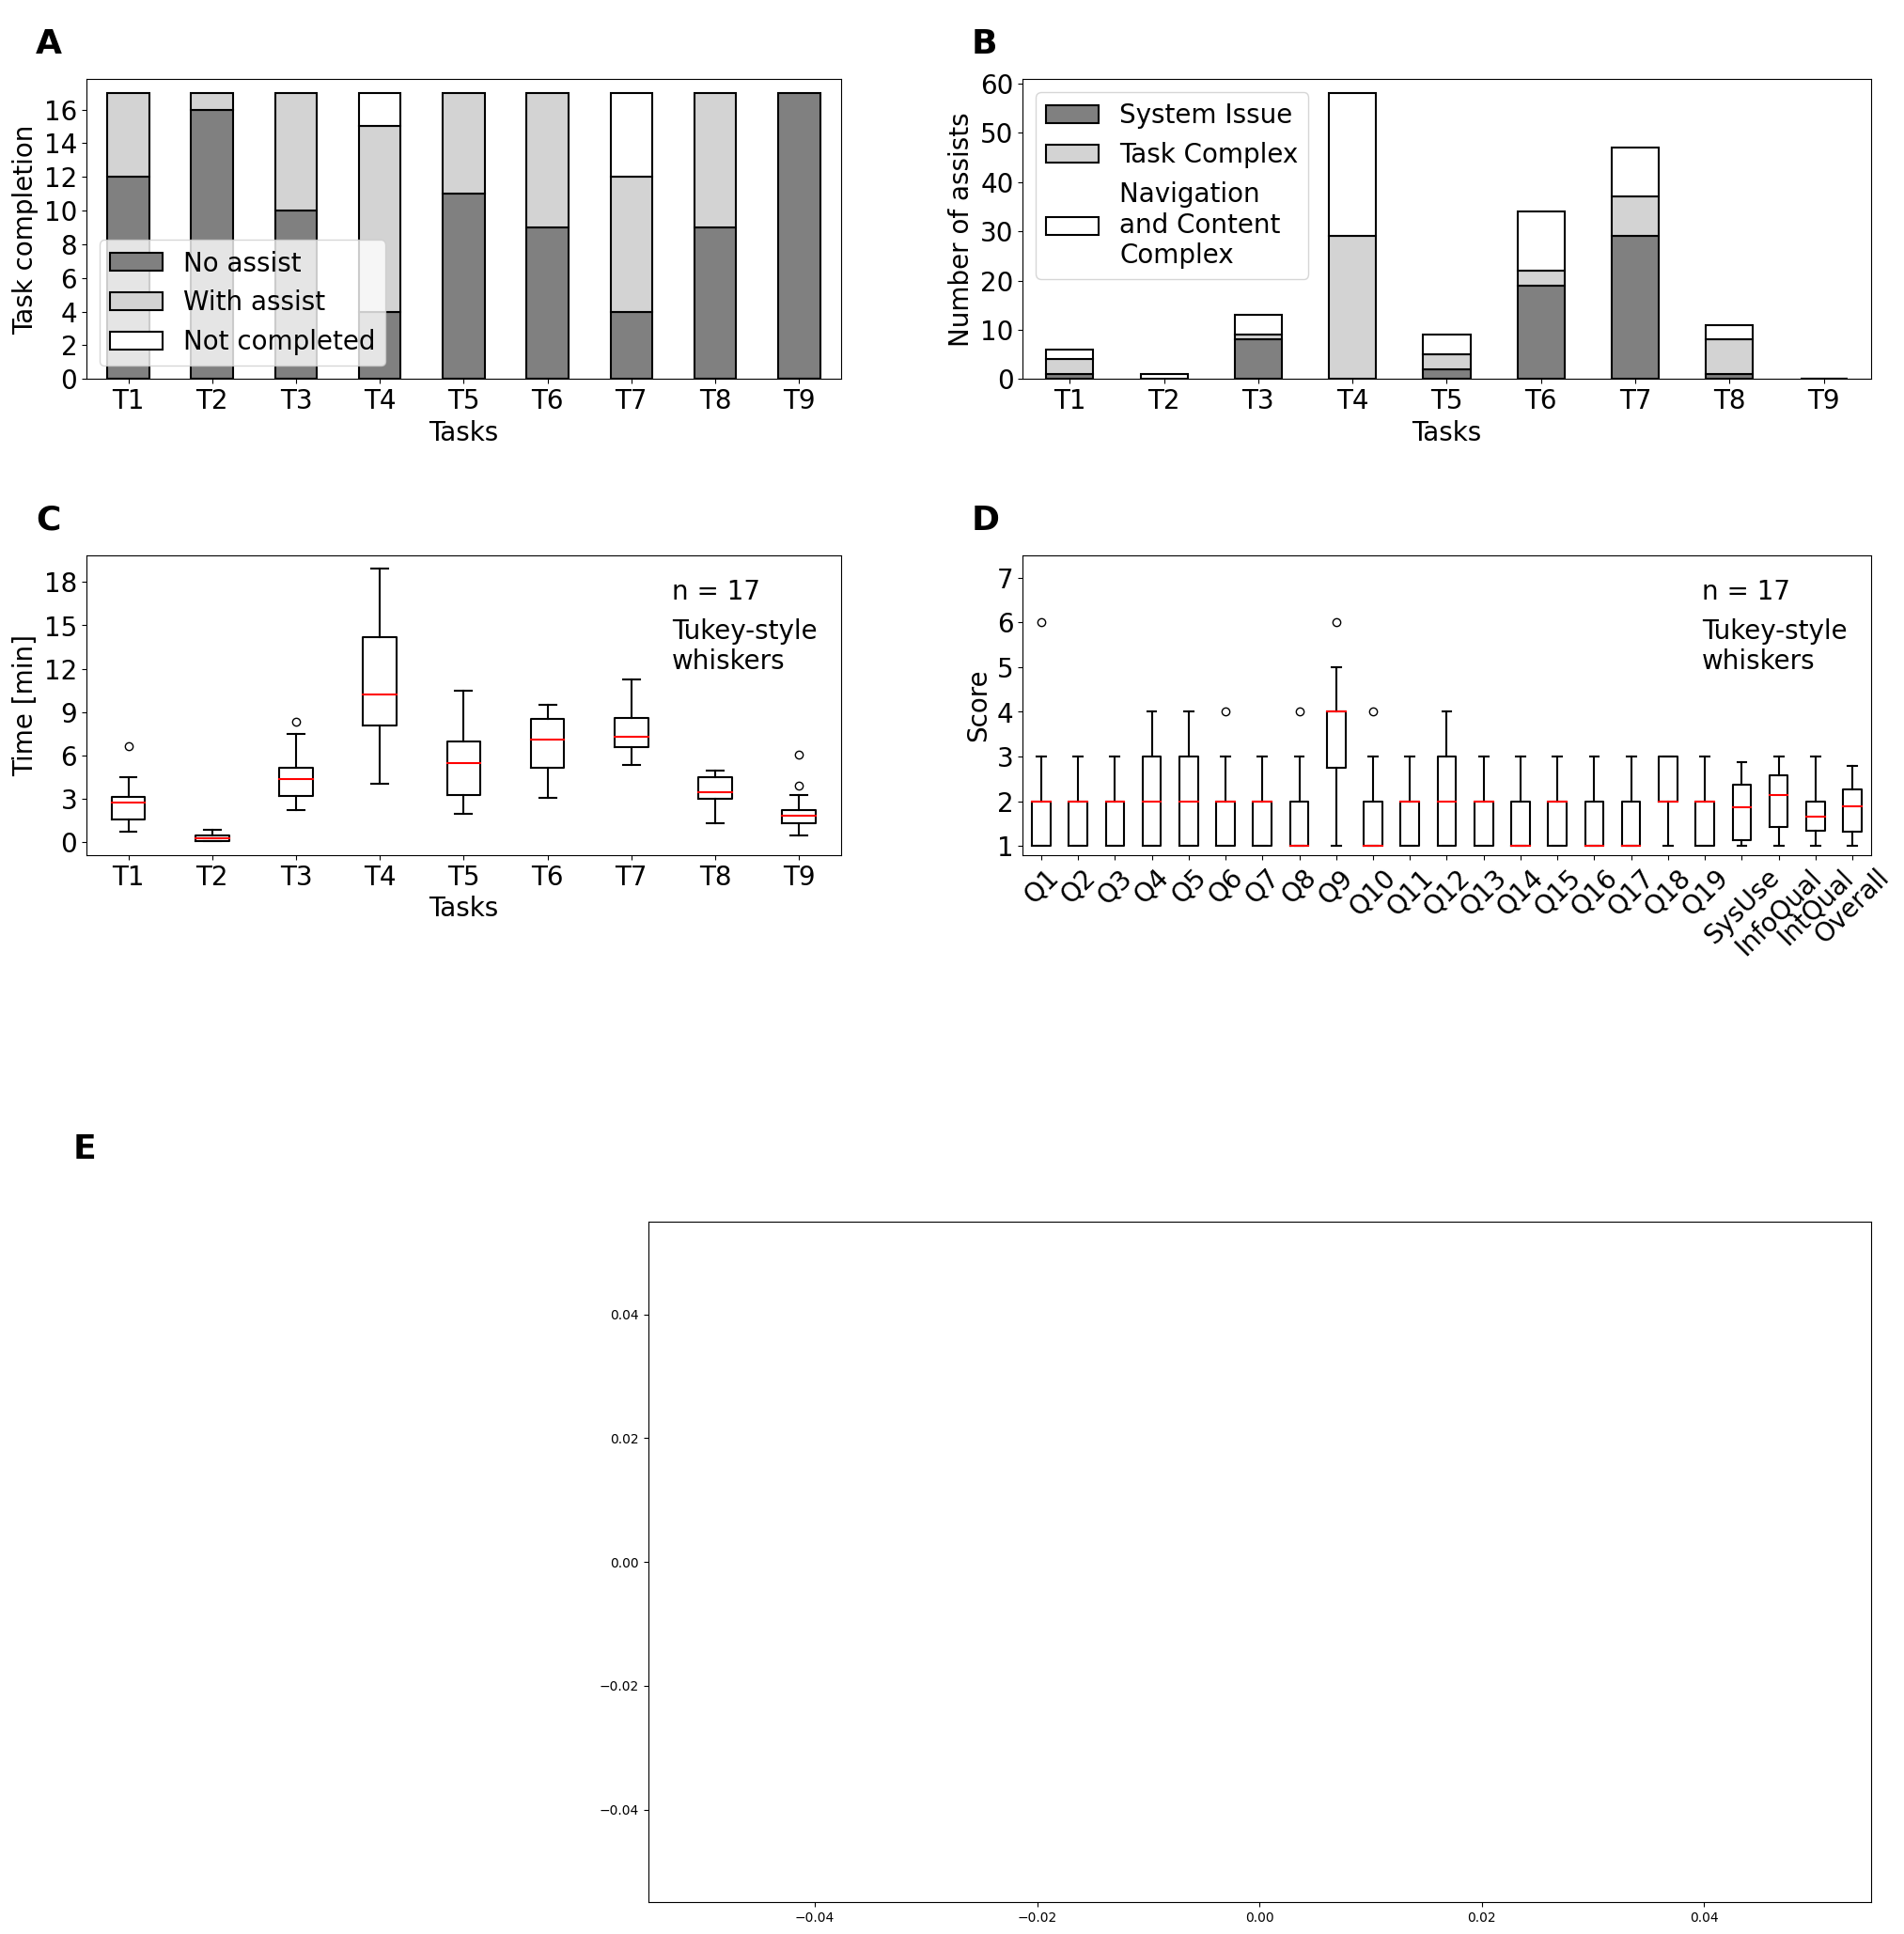

In [42]:
# Import PSSUQ results
PSSUQ_filePath = 'data/PSSUQ/scores/SERDIF_PSSUQ_P2.csv'
PSSUQ_df = pd.read_csv(PSSUQ_filePath)
# Prepare datasets to combine in boxplots
nParticipants = int(len(PSSUQ_df.columns) / 2 - 1)
PSSUQ_df = PSSUQ_df.select_dtypes(['int64', 'float64'])
PSSUQ_df.columns = ['Q' + str(i + 1) for i in range(nParticipants)]
PSSUQ_df.index = ['P' + str(i + 1) for i in range(17)]

# Individual questions
PSSUQ_IQ = PSSUQ_df

# Grouped questions 3 groups (1-18)
PSSUQ_GQ = PSSUQ_df.T
PSSUQ_GQ['ScoresG'] = ['SysUse', 'SysUse', 'SysUse', 'SysUse', 'SysUse', 'SysUse', 'SysUse', 'SysUse',
                       'InfoQual', 'InfoQual', 'InfoQual', 'InfoQual', 'InfoQual', 'InfoQual', 'InfoQual',
                       'IntQual', 'IntQual', 'IntQual', 'Overall']

# Remove question 19
PSSUQ_GQ = PSSUQ_GQ[PSSUQ_GQ.ScoresG != 'Overall']
PSSUQ_GQ = PSSUQ_GQ.groupby(['ScoresG'], sort=False).mean().T

# Overall (1-19)
PSSUQ_OQ = pd.DataFrame({'Overall': PSSUQ_df.T.mean(axis=0)})

# Join into one dataset
PSSUQ_Summary = PSSUQ_IQ.join(PSSUQ_GQ).join(PSSUQ_OQ)

sp_F3D = PSSUQ_Summary.plot(
    kind='box',
    # color=dict(boxes='red', whiskers='r', medians='r', caps='r'),
    boxprops=dict(linestyle='-', linewidth=1.5, color='black'),
    # flierprops=dict(linestyle='-', linewidth=1.5),
    medianprops=dict(linestyle='-', linewidth=1.5, color='red'),
    whiskerprops=dict(linestyle='-', linewidth=1.5, color='black'),
    capprops=dict(linestyle='-', linewidth=1.5, color='black'),
    showfliers=True, grid=False, rot=45, fontsize=20,
    ax=ax4
)

# bp = plt.boxplot(PSSUQ_Summary, patch_artist=True)
sp_F3D.set_ylabel('Score', fontsize=20)
# sp_F3D.set_xlabel('', fontsize=20)
# sp_F3D.set_xlabel('PSSUQ Item/Scale', fontsize=20)
sp_F3D.set_ylim([0.8, 7.5])

nPartPlot = 'n = ' + str(17)

sp_F3D.legend([nPartPlot, 'Tukey-style\nwhiskers'],
              loc='upper right', ncol=1,
              frameon=False, handlelength=0.0,
              fontsize=20)
display(fig)

### Figure 3E: Codes and themes of the thematic analysis as a heat map

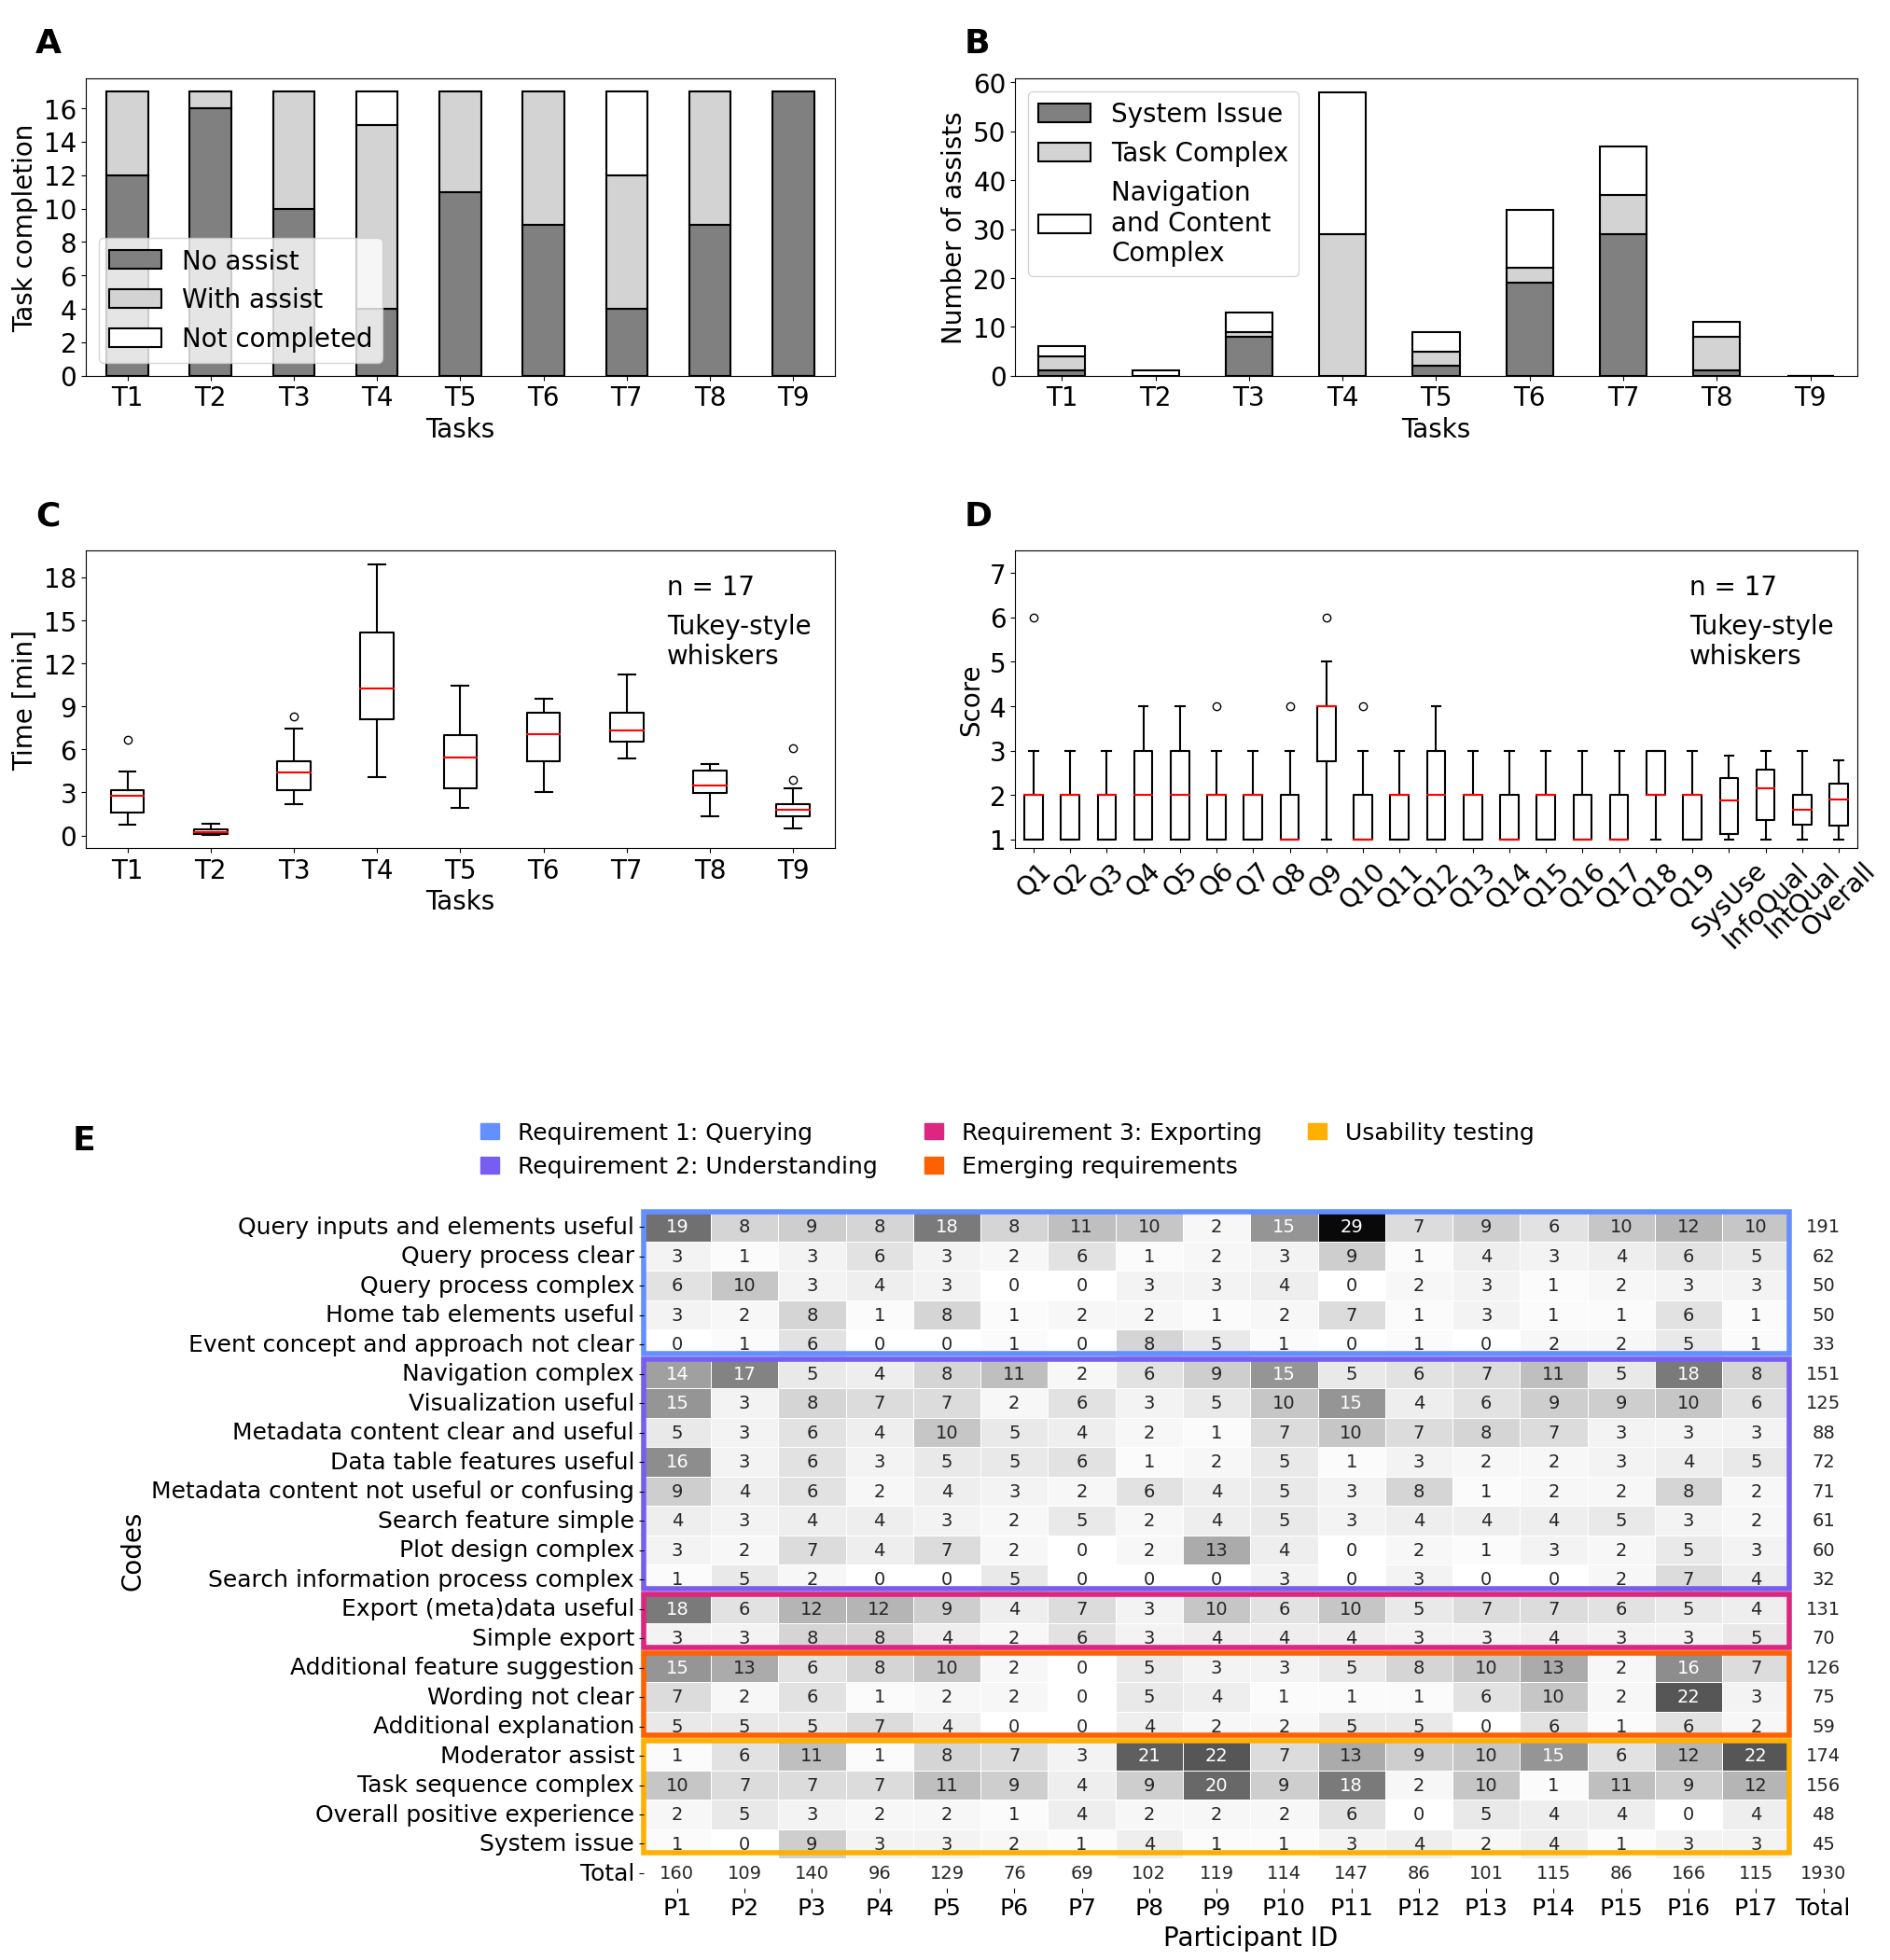

In [43]:
# Import all_tags.csv exported from Taguette
df = pd.read_csv('data/transcripts/thematic-analysis/tags/csv/all_tags_20220303.csv')

# Create a frequency table based on the document and tag columns
df = df.groupby(['document', 'tag']).size().reset_index(name='references')

# Select only participants ID from the filename
df['document'] = df['document'].map(lambda x: x.split('_')[0])

# Transform dataframe from long to wide format
# Fill the resulting NaN with 0 as they are references
# Convert float values to integers
df_wide = df.pivot_table(index='tag', columns='document', values='references', aggfunc='sum').fillna(0).astype(int)

# Order dataframe columns based on participant ID
id_order = ['P' + str(i + 1) for i in range(17)]
df_sorted = df_wide[id_order]

# Order dataframe rows based on themes
# Requirement 1: Query environmental data associated with individual events
theme_1 = ['Query inputs and elements useful',
           'Query process clear',
           'Query process complex',
           'Home tab elements useful',
           'Event concept and approach not clear',
           ]
# Requirement 2: Understand the linked data
theme_2 = [
    'Navigation complex',
    'Visualization useful',
    'Metadata content clear and useful',
    'Data table features useful',
    'Metadata content not useful or confusing',
    'Search feature simple',
    'Plot design complex',
    'Search information process complex',
]
# Requirement 3: Export the (meta)data for analysis
theme_3 = [
    'Export (meta)data useful',
    'Simple export',
]
# General
theme_4 = [
    'Additional feature suggestion',
    'Wording not clear',
    'Additional explanation'
]
# Usability testing
theme_5 = [
    'Moderator assist',
    'Task sequence complex',
    'Overall positive experience',
    'System issue',

]
theme_order = theme_1 + theme_2 + theme_3 + theme_4 + theme_5
df_themes = df_sorted.reindex(theme_order)

# Add a column with the totals
df_themes.loc['Total'] = df_themes.sum()
df_themes['Total'] = df_themes.sum(axis=1)

# Draw a heatmap with the numeric values in each cell
my_cmap = sns.color_palette('Greys', as_cmap=True)
my_cmap.set_over('white')
# sns.set(font_scale=1.5)
sp_F3E = sns.heatmap(df_themes, annot=True, fmt='d', linewidths=0.5, ax=ax5, cbar=False, vmax=30,
                     cmap=my_cmap, annot_kws={'fontsize': 14})

sp_F3E.set_xlabel('Participant ID', fontsize=20)
sp_F3E.set_ylabel('Codes', fontsize=20)
sp_F3E.tick_params(axis='both', which='major', labelsize=18)
# Draw rectangles to group codes into themes
ax5.add_patch(
    plt.Rectangle([0, 0],  # Starting point
                  17,  # width
                  len(theme_1) - 0.2,  # height
                  color='#648FFF', linewidth=4, fill=False, clip_on=False, alpha=1)
)
ax5.add_patch(
    plt.Rectangle([0, len(theme_1)],  # Starting point
                  17,  # width
                  len(theme_2) - 0.2,  # height
                  color='#785EF0', linewidth=4, fill=False, clip_on=False, alpha=1)
)
ax5.add_patch(
    plt.Rectangle([0, (len(theme_1) + len(theme_2))],  # Starting point
                  17,  # width
                  len(theme_3) - 0.2,  # height
                  color='#DC267F', linewidth=4, fill=False, clip_on=False, alpha=1)
)
ax5.add_patch(
    plt.Rectangle([0, (len(theme_1) + len(theme_2) + len(theme_3))],  # Starting point
                  17,  # width
                  len(theme_4) - 0.2,  # height
                  color='#FE6100', linewidth=4, fill=False, clip_on=False, alpha=1)
)
ax5.add_patch(
    plt.Rectangle([0, (len(theme_1) + len(theme_2) + len(theme_3) + len(theme_4))],  # Starting point
                  17,  # width
                  len(theme_5) - 0.2,  # height
                  color='#FFB000', linewidth=4, fill=False, clip_on=False, alpha=1)
)
legend_handles = [Patch(color='#648FFF', label='Requirement 1: Querying'),
                  Patch(color='#785EF0', label='Requirement 2: Understanding'),
                  Patch(color='#DC267F', label='Requirement 3: Exporting'),
                  Patch(color='#FE6100', label='Emerging requirements'),
                  Patch(color='#FFB000', label='Usability testing')]

sp_F3E.legend(handles=legend_handles, ncol=3, bbox_to_anchor=[0.3, 1.02],
              loc='lower center', fontsize=18, handlelength=.8, frameon=False)
display(fig)

## Figure 4: Comparative PSSUQ between P1 and P2

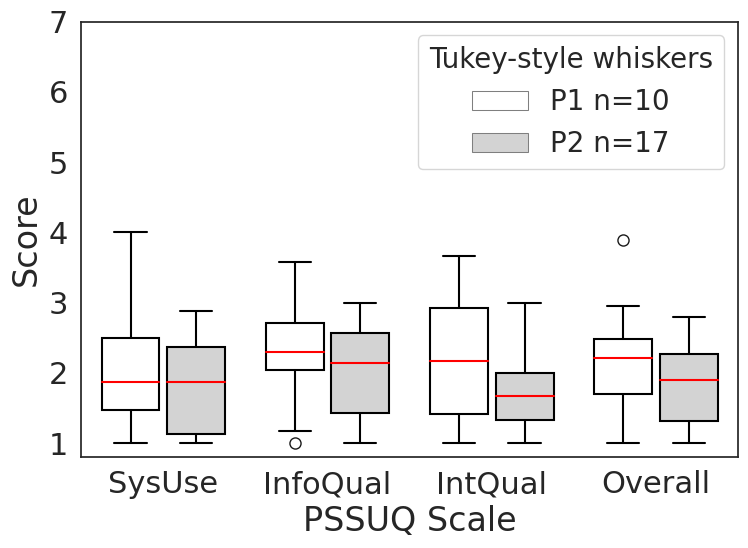

In [11]:
# Convert Google form PSSUQ to a summary data frame
def formPSSUQ(filePath):
    PSSUQ_df = pd.read_csv(filePath)
    # 2. Prepare datasets to combine in boxplots
    nParticipants = int(len(PSSUQ_df.columns) / 2 - 1)
    PSSUQ_df = PSSUQ_df.select_dtypes(['int64', 'float64'])
    PSSUQ_df.columns = ['Q' + str(i + 1) for i in range(nParticipants)]
    PSSUQ_df.index = ['P' + str(i + 1) + '-Nov21' for i in range(17)]
    # 2.1. Individual questions
    PSSUQ_IQ = PSSUQ_df

    # 2.2. Grouped questions 3 groups (1-18)
    PSSUQ_GQ = PSSUQ_df.T
    PSSUQ_GQ['ScoresG'] = ['SysUse', 'SysUse', 'SysUse', 'SysUse', 'SysUse', 'SysUse', 'SysUse', 'SysUse',
                           'InfoQual', 'InfoQual', 'InfoQual', 'InfoQual', 'InfoQual', 'InfoQual', 'InfoQual',
                           'IntQual', 'IntQual', 'IntQual', 'Overall']

    # Remove question 19
    PSSUQ_GQ = PSSUQ_GQ[PSSUQ_GQ.ScoresG != 'Overall']
    PSSUQ_GQ = PSSUQ_GQ.groupby(['ScoresG'], sort=False).mean().T

    # 2.3. Overall (1-19)
    PSSUQ_OQ = pd.DataFrame({'Overall': PSSUQ_df.T.mean(axis=0)})
    # Join into one dataset
    PSSUQ_Summary = PSSUQ_GQ.join(PSSUQ_OQ)
    PSSUQ_Summary = PSSUQ_Summary.reset_index()
    return PSSUQ_Summary


# Convert manual PSSUQ to a summary data frame
def manualPSSUQ(filePath):
    PSSUQ_df = pd.read_csv(filePath)
    nParticipants = len(PSSUQ_df.columns) - 1
    # 2. Prepare datasets to combine in boxplots
    PSSUQ_df = PSSUQ_df.set_index('Questions')

    # 2.2. Grouped questions 3 groups (1-18)
    PSSUQ_GQ = PSSUQ_df
    PSSUQ_GQ['ScoresG'] = ['SysUse', 'SysUse', 'SysUse', 'SysUse', 'SysUse', 'SysUse', 'SysUse', 'SysUse',
                           'InfoQual', 'InfoQual', 'InfoQual', 'InfoQual', 'InfoQual', 'InfoQual', 'InfoQual',
                           'IntQual', 'IntQual', 'IntQual', 'Overall']
    # Remove question 19
    PSSUQ_GQ = PSSUQ_GQ[PSSUQ_GQ.ScoresG != 'Overall']
    PSSUQ_GQ = PSSUQ_GQ.groupby(['ScoresG'], sort=False).mean().T

    # 2.3. Overall (1-19)
    PSSUQ_OQ = pd.DataFrame({'Overall': PSSUQ_df.mean(axis=0)})

    # Join into one dataset
    PSSUQ_Summary = PSSUQ_GQ.join(PSSUQ_OQ)
    PSSUQ_Summary.index = PSSUQ_Summary.index + '-Feb21'
    PSSUQ_Summary = PSSUQ_Summary.reset_index()
    return PSSUQ_Summary


def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5 * (xmin + xmax)
                xhalf = 0.5 * (xmax - xmin)

                # setting new width of box
                xmin_new = xmid - fac * xhalf
                xmax_new = xmid + fac * xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])



# Compare aggregated measures from the teo PSSUQ questionnaires
# Import first PSSUQ and format the dataframe
df_form = formPSSUQ(filePath='data/PSSUQ/scores/SERDIF_PSSUQ_P2.csv')
df_manual = manualPSSUQ(filePath='data/PSSUQ/scores/SERDIF_PSSUQ_P1.csv')

# Convert data frames from wide to long
df_manual_long = pd.melt(df_manual, id_vars='index', value_vars=['SysUse', 'InfoQual', 'IntQual', 'Overall'])
df_manual_long['group'] = 'P1 n=10'

df_form_long = pd.melt(df_form, id_vars='index', value_vars=['SysUse', 'InfoQual', 'IntQual', 'Overall'])
df_form_long['group'] = 'P2 n=17'

# Concat dataframes
df_box_group = pd.concat([df_manual_long, df_form_long], axis=0)
sns.set(font_scale=2)
sns.set_style('white')
fig = plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    x='variable', y='value', hue='group',
    data=df_box_group,  # showfliers=False,
    palette={'P1 n=10': 'white', 'P2 n=17': '#D3D3D3', },
    boxprops=dict(linestyle='-', linewidth=1.5, edgecolor='black'),
    flierprops=dict(marker='o', markerfacecolor='w',
                    markersize=8, linestyle='none', markeredgecolor='k'),
    medianprops=dict(linestyle='-', linewidth=1.5, color='red'),
    whiskerprops=dict(linestyle='-', linewidth=1.5, color='black'),
    capprops=dict(linestyle='-', linewidth=1.5, color='black'),
)
# Custom x and y axis labels
plt.ylabel('Score')  # , fontsize=20)
plt.xlabel('PSSUQ Scale')  # , fontsize=20)
# Custom y range
plt.ylim([0.8, 7])
# Custom legend
plt.legend(title='Tukey-style whiskers', title_fontsize=20, prop={'size': 20})
# Separate boxes withn a group
adjust_box_widths(fig, 0.9)
# Increase bottom space
fig.subplots_adjust(bottom=0.15)


## Figure 4: Figure 4: PSSUQ codes heat map

<Figure size 2000x1600 with 0 Axes>

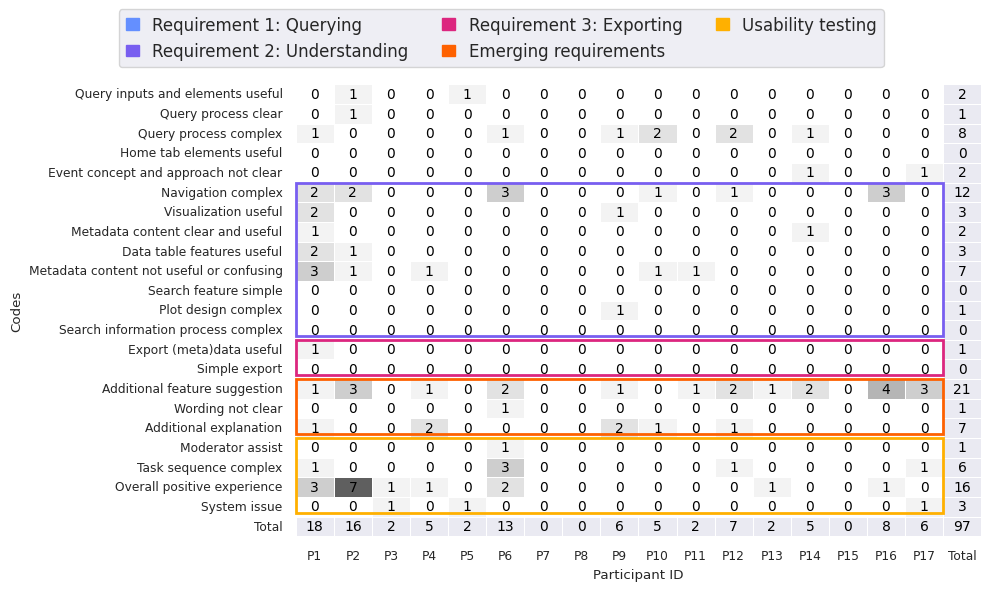

In [21]:
fig = plt.figure(figsize=(20, 16))
# Read all_tags.csv exported from Taguette
df = pd.read_csv('data/transcripts/thematic-analysis/tags/csv/all_tags_20220301_PSSUQ.csv')

# Create a frequency table based on the document and tag columns
df = df.groupby(['document', 'tag']).size().reset_index(name='references')

# Select only participants ID from the filename
df['document'] = df['document'].map(lambda x: x.split('_')[0])

# Transform dataframe from long to wide format
# Fill the resulting NaN with 0 as they are references
# Convert float values to integers
df_wide = df.pivot_table(index='tag', columns='document', values='references', aggfunc='sum').fillna(0).astype(int)
df_wide['P7'] = 0
df_wide['P8'] = 0
df_wide['P15'] = 0
# Order dataframe columns based on participant ID
id_order = ['P' + str(i + 1) for i in range(17)]

df_sorted = df_wide[id_order]


# Order dataframe rows based on themes
# Requirement 1: Query environmental data associated with individual events
theme_1 = ['Query inputs and elements useful',
           'Query process clear',
           'Query process complex',
           'Home tab elements useful',
           'Event concept and approach not clear',
           ]
# Requirement 2: Understand the linked data
theme_2 = [
    'Navigation complex',
    'Visualization useful',
    'Metadata content clear and useful',
    'Data table features useful',
    'Metadata content not useful or confusing',
    'Search feature simple',
    'Plot design complex',
    'Search information process complex',
]
# Requirement 3: Export the (meta)data for analysis
theme_3 = [
    'Export (meta)data useful',
    'Simple export',
]
# General
theme_4 = [
    'Additional feature suggestion',
    'Wording not clear',
    'Additional explanation'
]
# Usability testing
theme_5 = [
    'Moderator assist',
    'Task sequence complex',
    'Overall positive experience',
    'System issue',

]
theme_order = theme_1 + theme_2 + theme_3 + theme_4 + theme_5
df_themes = df_sorted.reindex(theme_order)

# Add a column with the totals

df_themes = df_themes.fillna(0).astype(int)
df_themes.loc['Total'] = df_themes.sum()
df_themes['Total'] = df_themes.sum(axis=1)

# Generate mask to avoid coloring the Total column
mask = np.zeros(df_themes.shape)
mask[:, (df_themes.shape[1]-1)] = True
mask[(df_themes.shape[0]-1), :] = True
sns.set(font_scale = 0.8)
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 6))
my_cmap = sns.color_palette('Greys', as_cmap=True)

sns.heatmap(df_themes, mask=mask, fmt='d', linewidths=0.5, cbar=False, cmap=my_cmap, vmax=10, annot_kws={'fontsize': 4})
sns.heatmap(df_themes, annot=True, fmt='d', linewidths=0.5, ax=ax, cbar=False, cmap=my_cmap, alpha=0,
            annot_kws={'size': 10, 'color':'black'})
ax.set(xlabel='Participant ID',
       ylabel='Codes')

# Draw rectangles to group codes into themes
axp.add_patch(
    plt.Rectangle([0, 0],  # Starting point
                  17,  # width
                  len(theme_1) - 0.2,  # height
                  color='#648FFF', linewidth=2, fill=False, clip_on=False, alpha=1)
)
ax.add_patch(
    plt.Rectangle([0, len(theme_1)],  # Starting point
                  17,  # width
                  len(theme_2) - 0.2,  # height
                  color='#785EF0', linewidth=2, fill=False, clip_on=False, alpha=1)
)
ax.add_patch(
    plt.Rectangle([0, (len(theme_1) + len(theme_2))],  # Starting point
                  17,  # width
                  len(theme_3) - 0.2,  # height
                  color='#DC267F', linewidth=2, fill=False, clip_on=False, alpha=1)
)
ax.add_patch(
    plt.Rectangle([0, (len(theme_1) + len(theme_2) + len(theme_3))],  # Starting point
                  17,  # width
                  len(theme_4) - 0.2,  # height
                  color='#FE6100', linewidth=2, fill=False, clip_on=False, alpha=1)
)
ax.add_patch(
    plt.Rectangle([0, (len(theme_1) + len(theme_2) + len(theme_3) + len(theme_4))],  # Starting point
                  17,  # width
                  len(theme_5) - 0.2,  # height
                  color='#FFB000', linewidth=2, fill=False, clip_on=False, alpha=1)
)
legend_handles = [Patch(color='#648FFF', label='Requirement 1: Querying'),
                  Patch(color='#785EF0', label='Requirement 2: Understanding'),
                  Patch(color='#DC267F', label='Requirement 3: Exporting'),
                  Patch(color='#FE6100', label='Emerging requirements'),
                  Patch(color='#FFB000', label='Usability testing')]
plt.legend(handles=legend_handles, ncol=3, bbox_to_anchor=[0.3, 1.02], loc='lower center', fontsize=12, handlelength=.8)